### Before I start, I need to ask whether the origin of the company name was from Mr. Blue Sky?
Anyway, here's a video I hope you'll like
https://www.youtube.com/watch?v=nyD6g47DHQk&list=WL&index=12&ab_channel=SolarProphet

### Approach

* Shortlisting the domains in which COVID-19 might have had an effect
* Corresponding changes on climate
* Types of datasets which measure this information (Geography no bar)
* Machine learning, correlations, statistical A/B testing.
* Theorise and conduct research 

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7556229/
Effects of Covid 19

Domains with direct change
* Reduced demand, productions and emissions - factories, industries (Water pollution, Carbon, NO2, PM)
* Reduced travels - trains, flights, cars
* Reduced deforestation and pollution - effect of climate change slowed, regrowth, improved AQI

Domains with indirect change
* Economy in shambles - less purchases, less production, less travel
* Reduced energy consumption - less fuel burning 

Hence I will be focussing on Air Travel/Deforestation, for which I will require data pertaining to: 
* OUTPUT: Air pollution, AQI, Water Pollution, Emissions
* INPUT: Deforestation, Transport
* OTHER: COVID-19


# Loading the Libraries

In [413]:
import numpy as np
import pandas as pd

# COVID, Deforestation and Climate

In [414]:
# The Dataset I have chosen is for all of India, and my Hypothesis is that the the climate would improve over the pandemic, due to reduced deforestation.

# https://www.globalforestwatch.org/dashboards/country/IND/?category=summary&dashboardPrompts=eyJzaG93UHJvbXB0cyI6dHJ1ZSwicHJvbXB0c1ZpZXdlZCI6W10sInNldHRpbmdzIjp7Im9wZW4iOmZhbHNlLCJzdGVwSW5kZXgiOjAsInN0ZXBzS2V5IjoiIn0sIm9wZW4iOnRydWUsInN0ZXBzS2V5IjoiZG93bmxvYWREYXNoYm9hcmRTdGF0cyJ9&location=WyJjb3VudHJ5IiwiSU5EIl0%3D&map=eyJjZW50ZXIiOnsibGF0IjoyMS44NDUzNzY1NTI5NTU2NzgsImxuZyI6ODIuODAwNzA0OTU1MDQ2ODF9LCJ6b29tIjozLjI1MTg4NTQ3NjE0MzE0MTUsImNhbkJvdW5kIjpmYWxzZSwiZGF0YXNldHMiOlt7Im9wYWNpdHkiOjAuNywidmlzaWJpbGl0eSI6dHJ1ZSwiZGF0YXNldCI6InByaW1hcnktZm9yZXN0cyIsImxheWVycyI6WyJwcmltYXJ5LWZvcmVzdHMtMjAwMSJdfSx7ImRhdGFzZXQiOiJwb2xpdGljYWwtYm91bmRhcmllcyIsImxheWVycyI6WyJkaXNwdXRlZC1wb2xpdGljYWwtYm91bmRhcmllcyIsInBvbGl0aWNhbC1ib3VuZGFyaWVzIl0sImJvdW5kYXJ5Ijp0cnVlLCJvcGFjaXR5IjoxLCJ2aXNpYmlsaXR5Ijp0cnVlfSx7ImRhdGFzZXQiOiJ0cmVlLWNvdmVyLWxvc3MiLCJsYXllcnMiOlsidHJlZS1jb3Zlci1sb3NzIl0sIm9wYWNpdHkiOjEsInZpc2liaWxpdHkiOnRydWUsInRpbWVsaW5lUGFyYW1zIjp7InN0YXJ0RGF0ZSI6IjIwMDItMDEtMDEiLCJlbmREYXRlIjoiMjAyMS0xMi0zMSIsInRyaW1FbmREYXRlIjoiMjAyMS0xMi0zMSJ9LCJwYXJhbXMiOnsidGhyZXNob2xkIjozMCwidmlzaWJpbGl0eSI6dHJ1ZX19XX0%3D&showMap=true

In [415]:
tree_cover_loss = pd.read_excel('IND.xlsx', sheet_name='Subnational 1 tree cover loss')
carbon_data = pd.read_excel('IND.xlsx', sheet_name='Subnational 1 carbon data')

In [416]:
tree_cover_loss.head()

,country,subnational1,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2012_ha,tc_loss_ha_2001,tc_loss_ha_2002,tc_loss_ha_2003,...,tc_loss_ha_2012,tc_loss_ha_2013,tc_loss_ha_2014,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020,tc_loss_ha_2021
0,India,Andaman and Nicobar,0,761084,761084,761084,5845,1415,1897,1649,...,771,542,1808,78,183,308,121,197,1423,136
1,India,Andaman and Nicobar,10,761084,690589,687885,5845,1411,1889,1634,...,696,483,1395,73,163,288,109,166,998,124
2,India,Andaman and Nicobar,15,761084,688662,684209,5845,1411,1888,1634,...,695,481,1384,73,162,288,108,166,990,123
3,India,Andaman and Nicobar,20,761084,687428,683262,5845,1411,1887,1632,...,693,479,1374,73,161,287,108,165,982,123
4,India,Andaman and Nicobar,25,761084,686301,681337,5845,1411,1887,1632,...,693,478,1369,73,161,286,107,164,977,123


In [417]:
carbon_data.rename(columns={'umd_tree_cover_density_2000__threshold': 'threshold'}, inplace=True)
carbon_data.head()

,country,subnational1,threshold,umd_tree_cover_extent_2000__ha,whrc_aboveground_biomass_stock_2000__Mg,avg_whrc_aboveground_biomass_2000_Mg_ha-1,gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1,gfw_forest_carbon_gross_removals__Mg_CO2_yr-1,gfw_forest_carbon_net_flux__Mg_CO2e_yr-1,gfw_forest_carbon_gross_emissions_2001__Mg_CO2e,...,gfw_forest_carbon_gross_emissions_2012__Mg_CO2e,gfw_forest_carbon_gross_emissions_2013__Mg_CO2e,gfw_forest_carbon_gross_emissions_2014__Mg_CO2e,gfw_forest_carbon_gross_emissions_2015__Mg_CO2e,gfw_forest_carbon_gross_emissions_2016__Mg_CO2e,gfw_forest_carbon_gross_emissions_2017__Mg_CO2e,gfw_forest_carbon_gross_emissions_2018__Mg_CO2e,gfw_forest_carbon_gross_emissions_2019__Mg_CO2e,gfw_forest_carbon_gross_emissions_2020__Mg_CO2e,gfw_forest_carbon_gross_emissions_2021__Mg_CO2e
0,India,Andaman and Nicobar,0,761084,189162049,249,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,India,Andaman and Nicobar,10,690589,188896487,274,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,India,Andaman and Nicobar,15,688662,188686368,274,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,India,Andaman and Nicobar,20,687428,188539858,274,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,India,Andaman and Nicobar,25,686301,188408418,275,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [418]:
# The year data is in columns with the year in the header, so we will convert the columns to rows.

year_col = [col for col in tree_cover_loss if col.startswith('tc_loss_ha_')]
tree_cover_loss1 = tree_cover_loss.melt(id_vars=['threshold', 'subnational1','area_ha','extent_2000_ha','extent_2010_ha','gain_2000-2012_ha'], var_name='year', value_vars = year_col, value_name='tree_cover')

# taking the substring of the column name to get the year 
tree_cover_loss1['year'] = tree_cover_loss1['year'].str[-4:].astype(int)
tree_cover_loss1.head(25)

,threshold,subnational1,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2012_ha,year,tree_cover
0,0,Andaman and Nicobar,761084,761084,761084,5845,2001,1415
1,10,Andaman and Nicobar,761084,690589,687885,5845,2001,1411
2,15,Andaman and Nicobar,761084,688662,684209,5845,2001,1411
3,20,Andaman and Nicobar,761084,687428,683262,5845,2001,1411
4,25,Andaman and Nicobar,761084,686301,681337,5845,2001,1411
5,30,Andaman and Nicobar,761084,684402,679440,5845,2001,1410
6,50,Andaman and Nicobar,761084,675930,665409,5845,2001,1406
7,75,Andaman and Nicobar,761084,646075,633979,5845,2001,1378
8,0,Andhra Pradesh,16004980,16004980,16004980,2545,2001,994
9,10,Andhra Pradesh,16004980,1716644,1524973,2545,2001,890


In [419]:
# Doing the same for carbon data

year_col = [col for col in carbon_data if col.startswith('gfw_forest_carbon_gross_emissions_2')]
carbon_data1 = carbon_data.melt(id_vars=['threshold','subnational1','umd_tree_cover_extent_2000__ha', 'whrc_aboveground_biomass_stock_2000__Mg', 'avg_whrc_aboveground_biomass_2000_Mg_ha-1', 'gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1', 'gfw_forest_carbon_gross_removals__Mg_CO2_yr-1', 'gfw_forest_carbon_net_flux__Mg_CO2e_yr-1'], var_name='year', value_vars = year_col, value_name='carbon')
# taking the substring of the column name to get the year from the middle   
carbon_data1['year'] = carbon_data1['year'].str[-13:-9].astype(int)
carbon_data1.head(25)

,threshold,subnational1,umd_tree_cover_extent_2000__ha,whrc_aboveground_biomass_stock_2000__Mg,avg_whrc_aboveground_biomass_2000_Mg_ha-1,gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1,gfw_forest_carbon_gross_removals__Mg_CO2_yr-1,gfw_forest_carbon_net_flux__Mg_CO2e_yr-1,year,carbon
0,0,Andaman and Nicobar,761084,189162049,249,NaN,NaN,NaN,2001,NaN
1,10,Andaman and Nicobar,690589,188896487,274,NaN,NaN,NaN,2001,NaN
2,15,Andaman and Nicobar,688662,188686368,274,NaN,NaN,NaN,2001,NaN
3,20,Andaman and Nicobar,687428,188539858,274,NaN,NaN,NaN,2001,NaN
4,25,Andaman and Nicobar,686301,188408418,275,NaN,NaN,NaN,2001,NaN
5,30,Andaman and Nicobar,684402,188174530,275,522028.0,2419325.82,-1897298.0,2001,977903.0
6,50,Andaman and Nicobar,675930,186987778,277,518293.0,2370730.34,-1852438.0,2001,976585.0
7,75,Andaman and Nicobar,646075,181498354,281,497930.0,2206285.07,-1708355.0,2001,966844.0
8,0,Andhra Pradesh,16004980,256576857,16,NaN,NaN,NaN,2001,NaN
9,10,Andhra Pradesh,1716644,254248027,148,NaN,NaN,NaN,2001,NaN


In [420]:
# These fields will be joined on threshold, year and subnational1
tree_cover_loss1['subnational1'] = tree_cover_loss1['subnational1'].str.lower()
carbon_data1['subnational1'] = carbon_data1['subnational1'].str.lower()

In [421]:
# merging the two dataframes
df = pd.merge(tree_cover_loss1, carbon_data1, on=['subnational1', 'threshold','year'])
# In the data, carbon data is unavailable for some thresholds, so we will drop those rows
df.dropna(inplace=True)

In [422]:
df.shape

(2268, 15)

In [423]:
df.drop(['extent_2000_ha', 'extent_2010_ha', 'gain_2000-2012_ha','umd_tree_cover_extent_2000__ha','whrc_aboveground_biomass_stock_2000__Mg','avg_whrc_aboveground_biomass_2000_Mg_ha-1','gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1', 'gfw_forest_carbon_gross_removals__Mg_CO2_yr-1', 'gfw_forest_carbon_net_flux__Mg_CO2e_yr-1'], axis=1, inplace=True)

In [424]:
# To observe the data for one state
df[df['subnational1'] == 'uttar pradesh']

,threshold,subnational1,area_ha,year,tree_cover,carbon
269,30,uttar pradesh,24075139,2001,522,226145.0
270,50,uttar pradesh,24075139,2001,392,176864.0
271,75,uttar pradesh,24075139,2001,183,86915.0
557,30,uttar pradesh,24075139,2002,147,61295.0
558,50,uttar pradesh,24075139,2002,97,43558.0
...,...,...,...,...,...,...
5742,50,uttar pradesh,24075139,2020,4,2287.0
5743,75,uttar pradesh,24075139,2020,1,491.0
6029,30,uttar pradesh,24075139,2021,3,1510.0
6030,50,uttar pradesh,24075139,2021,2,1155.0


array([[<AxesSubplot:title={'center':'threshold'}>,
        <AxesSubplot:title={'center':'area_ha'}>],
       [<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'tree_cover'}>],
       [<AxesSubplot:title={'center':'carbon'}>, <AxesSubplot:>]],
      dtype=object)

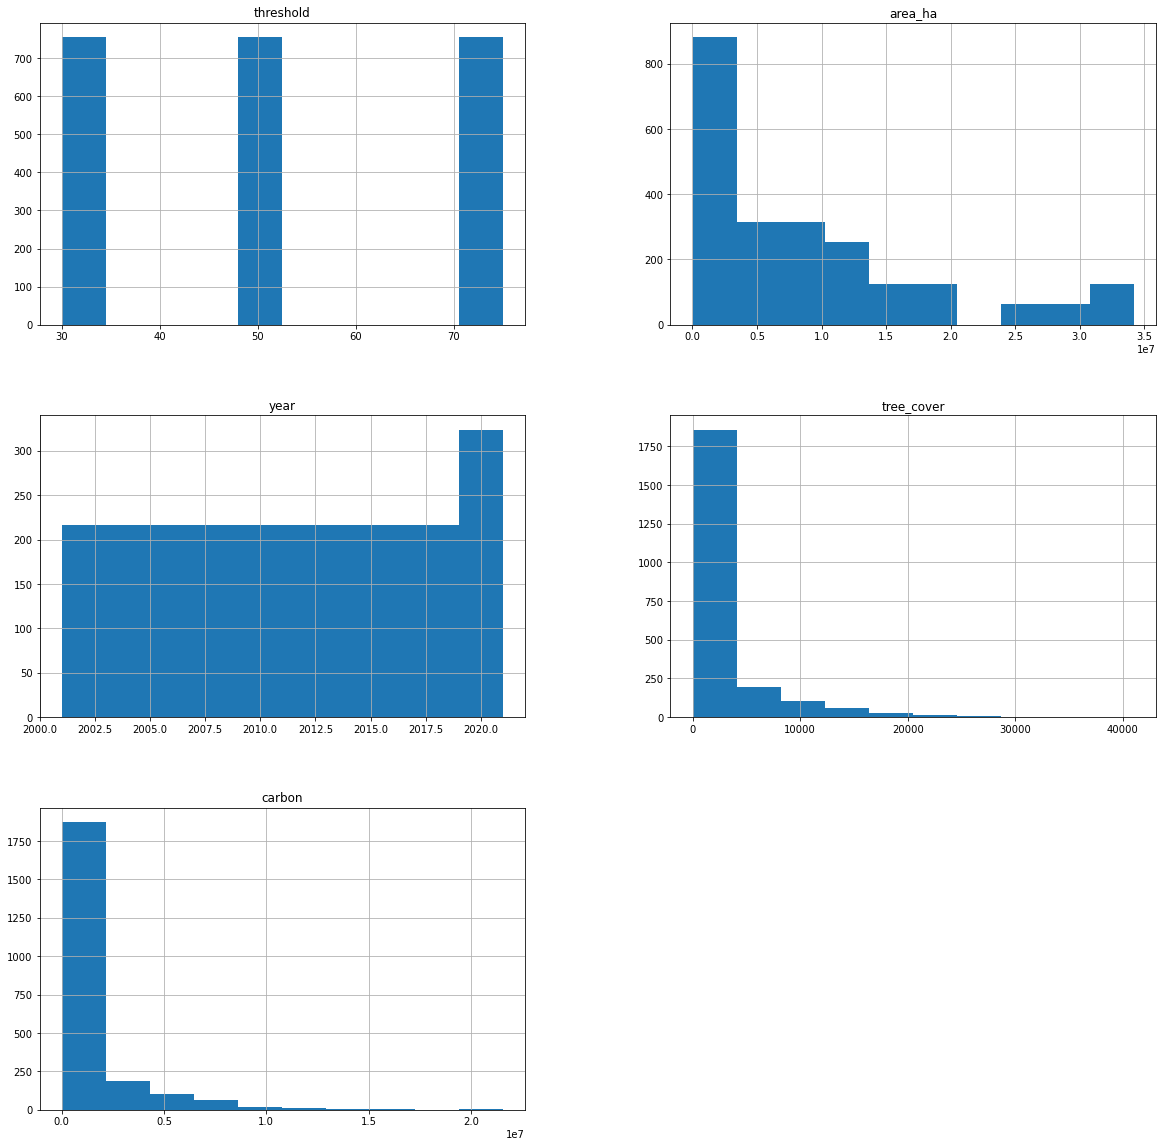

In [425]:
df.hist(figsize=(20,20))

In [426]:
# taking out the correlation between tree cover loss and carbon data
df.corr()
# this strongly suggests that as we increase the tree cover loss (i.e. increasing deforestation), the carbon levels decrease, which does not make sense.

,threshold,area_ha,year,tree_cover,carbon
threshold,1.000000e+00,2.810132e-18,1.334086e-15,-0.113332,-0.089059
area_ha,2.810132e-18,1.000000e+00,-4.853704e-16,-0.165610,-0.176497
year,1.334086e-15,-4.853704e-16,1.000000e+00,0.151150,0.160040
tree_cover,-1.133316e-01,-1.656098e-01,1.511502e-01,1.000000,0.994974
carbon,-8.905900e-02,-1.764972e-01,1.600396e-01,0.994974,1.000000


# COVID, Air Travel and Climate

In [427]:
# Here, I use the data for USA to see the relationship between Air Travel and Carbon Emissions over the pandemic.
# My hypothesis is that during the pandemic, the air travel reduces, and so do the carbon emissions.

# COVID Dataset:
# https://www.kaggle.com/datasets/imdevskp/corona-virus-report?resource=download&select=usa_county_wise.csv

# AQI Dataset:
# https://aqs.epa.gov/aqsweb/airdata/download_files.html#AQI 

# Air Travel Dataset:
# https://www.transtats.bts.gov/Data_Elements.aspx?Data=5

In [428]:
# First we will correlate COVID and Air travel, before we move further
# For Covid data, the Confirmed column is the most obvious parameter to correlate, as Active, Deaths, and Recovered are dependent on the 
# state of healthcare, and might thus be biased.

covid = pd.read_csv('usa_county_wise.csv')
air_traffic = pd.read_csv('Passengers_8_29_2022 5_01_13 PM.csv')

In [429]:
covid.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",1/22/20,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",1/22/20,0,0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",1/22/20,0,0
3,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",1/22/20,0,0
4,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,"Aguada, Puerto Rico, US",1/22/20,0,0


In [430]:
# Extracting the Month and Year from the date column
covid['Month'] = covid['Date'].str[:1].astype(int)
covid['Year'] = ('20'+covid['Date'].str[-2:]).astype(int)

In [431]:
# Flights departed (standardized in millions)
air_traffic['Total'] = air_traffic['Total'].str.replace(',', '').astype(int)
air_traffic['Total'] = air_traffic['Total']/1000000
air_traffic.head()

,Year,Month,DOMESTIC,INTERNATIONAL,Total
0,2002,10,"4,80,54,917","95,78,435",57.633352
1,2002,11,"4,48,50,246","90,16,535",53.866781
2,2002,12,"4,96,84,353","1,00,38,794",59.723147
3,2003,1,"4,30,32,450","97,26,436",52.758886
4,2003,2,"4,11,66,780","82,83,372",49.450152


In [432]:
cov1 = covid.groupby(['Year','Month'])['Confirmed'].sum().reset_index()

In [433]:
#The data granularity is Monthly, which is why we aggregated the COVID data.
at1 = air_traffic.groupby(['Year','Month'])['Total'].sum().reset_index()

In [434]:
cov1
# Since Jan 2020 was the first covid month, we won't have to extrapolate it.
# But for Jul 2020 (last month of dataset), we only have 22 out of 31 days while the air traffic data would be for all 31 days

,Year,Month,Confirmed
0,2020,1,38
1,2020,2,378
2,2020,3,1091068
3,2020,4,19552582
4,2020,5,45407574
5,2020,6,64933835
6,2020,7,93360473


In [435]:
# Hence we extrapolate the values for Jul 2020
cov1.loc[cov1['Month'] == 7, 'Confirmed'] = (cov1['Confirmed']*31/22).astype(int)
cov1

,Year,Month,Confirmed
0,2020,1,38
1,2020,2,378
2,2020,3,1091068
3,2020,4,19552582
4,2020,5,45407574
5,2020,6,64933835
6,2020,7,131553393


In [436]:
at1.tail()

,Year,Month,Total
231,2022,1,55.945035
232,2022,2,58.364395
233,2022,3,77.846358
234,2022,4,78.109845
235,2022,5,82.716948


In [437]:
data1 = cov1.merge(at1, on = ['Year','Month'], how = 'left')
data1

,Year,Month,Confirmed,Total
0,2020,1,38,80.594291
1,2020,2,378,75.708828
2,2020,3,1091068,43.377500
3,2020,4,19552582,3.281041
4,2020,5,45407574,8.234406
5,2020,6,64933835,16.936833
6,2020,7,131553393,24.784280


array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Month'}>],
       [<AxesSubplot:title={'center':'Confirmed'}>,
        <AxesSubplot:title={'center':'Total'}>]], dtype=object)

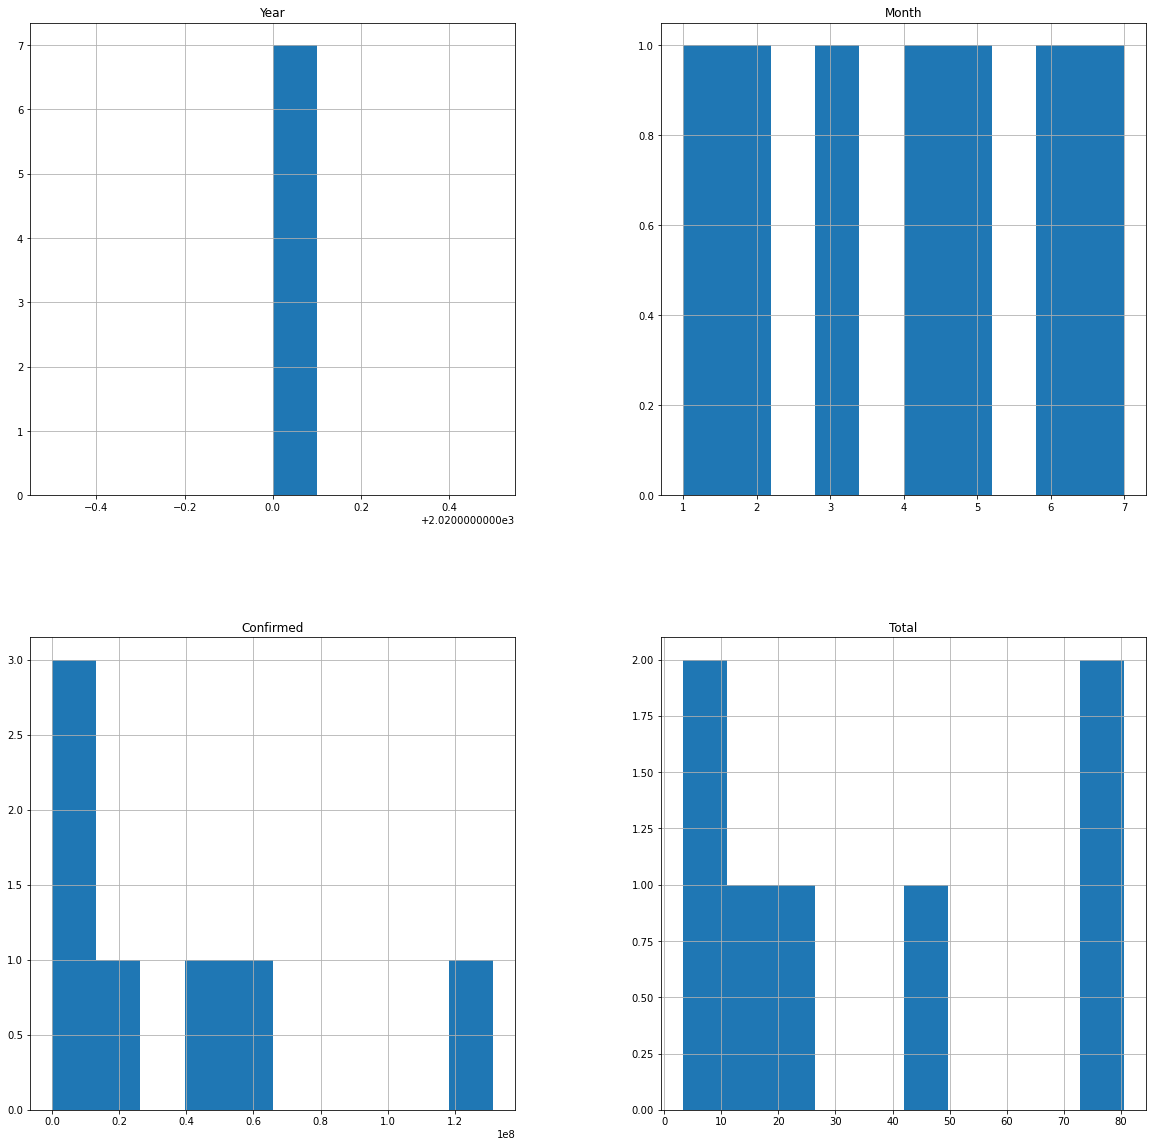

In [438]:
data1.hist(figsize=(20,20))

In [439]:
data1.corr()

,Year,Month,Confirmed,Total
Year,NaN,NaN,NaN,NaN
Month,NaN,1.000000,0.904639,-0.784254
Confirmed,NaN,0.904639,1.000000,-0.506198
Total,NaN,-0.784254,-0.506198,1.000000


In [440]:
# Another method we can use to correlate COVID and Air Travel is to use the log of the COVID data.
# This is because the data is highly skewed.

data1['Confirmed_log'] = np.log(data1['Confirmed'])
data1.corr()

,Year,Month,Confirmed,Total,Confirmed_log
Year,NaN,NaN,NaN,NaN,NaN
Month,NaN,1.000000,0.904639,-0.784254,0.910405
Confirmed,NaN,0.904639,1.000000,-0.506198,0.679791
Total,NaN,-0.784254,-0.506198,1.000000,-0.943835
Confirmed_log,NaN,0.910405,0.679791,-0.943835,1.000000


In [441]:
import math
from scipy.stats import t

# We can also use Statistical A/B testing to see if the correlation is stronger.
# Null Hyp = There was no sig. difference between the flights taken during and before the pandemic.

# Sample mean = Mean monthly air travel post-covid 
# Population mean 
# Sample Standard Deviation = Standard deviation of monthly air travel post-covid
# Sample Size = April - July 2020 from the dataset, inclusive = 4

sample_mean = np.mean(data1['Total'][data1['Month'] >= 4])
population_mean = np.mean(data1['Total'])
sample_std = np.std(data1['Total'][data1['Month'] >= 4])
sample_size = len(data1['Total'][data1['Month'] >= 4])

t_statistic = (sample_mean - population_mean)/(sample_std/math.sqrt(sample_size))
print(t_statistic)

p_value = 1 - t.cdf(abs(t_statistic), sample_size-1)
print(p_value)
# p-value is ~0.0, so we can reject the null hyp and conclude that at 99% LOS, there IS a significant difference between the the NO2 levels during and before the pandemic.

-5.5437412938597515
0.005785788446789231


In [442]:
# Given we have established correlation using the t-test and log-correl value, we can move forward that air travel was a domain affected by COVID-19, 
# and now we can capture its impact on the environment

In [443]:
# Now, for climate change data, we have the following AQI Files:
aqi2018 = pd.read_csv('daily_aqi_by_county_2018.csv')
aqi2019 = pd.read_csv('daily_aqi_by_county_2019.csv')
aqi2020 = pd.read_csv('daily_aqi_by_county_2020.csv')
aqi2021 = pd.read_csv('daily_aqi_by_county_2021.csv')
aqi = pd.concat([aqi2018, aqi2019, aqi2020, aqi2021])

In [444]:
aqi.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2018-01-02,32,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2018-01-05,34,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2018-01-08,15,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2018-01-11,19,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2018-01-14,25,Good,PM2.5,01-003-0010,1


In [445]:
aqi["Defining Parameter"].value_counts()

Ozone    742681
PM2.5    491279
PM10      46042
NO2       19404
CO         2661
Name: Defining Parameter, dtype: int64

In [446]:
# Aggregating the data by month and year
# Extracting month and year from the date column

aqi['Month'] = aqi['Date'].str[5:7].astype(int)
aqi['Year'] = aqi['Date'].str[:4].astype(int)
aqi.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,Month,Year
0,Alabama,Baldwin,1,3,2018-01-02,32,Good,PM2.5,01-003-0010,1,1,2018
1,Alabama,Baldwin,1,3,2018-01-05,34,Good,PM2.5,01-003-0010,1,1,2018
2,Alabama,Baldwin,1,3,2018-01-08,15,Good,PM2.5,01-003-0010,1,1,2018
3,Alabama,Baldwin,1,3,2018-01-11,19,Good,PM2.5,01-003-0010,1,1,2018
4,Alabama,Baldwin,1,3,2018-01-14,25,Good,PM2.5,01-003-0010,1,1,2018


In [447]:
# We will aggregate values by month, year and Defining Parameter using mean of AQI
aqi1 = aqi.groupby(['Year','Month','Defining Parameter'])['AQI'].agg('mean').reset_index()

In [448]:
# pivoting the defining parameters to different columns and resetting the index
aqi1 = aqi1.pivot(index=['Year','Month'], columns='Defining Parameter', values='AQI').reset_index()
aqi1.head()

Defining Parameter,Year,Month,CO,NO2,Ozone,PM10,PM2.5
0,2018,1,6.000000,30.578797,32.693392,24.440183,40.260191
1,2018,2,6.750000,28.694656,34.204966,27.247796,35.928636
2,2018,3,3.400000,35.669623,41.420259,25.334038,35.650163
3,2018,4,6.615385,30.822581,48.145586,34.479230,31.977727
4,2018,5,3.789474,26.108571,51.723170,29.106711,34.500356


In [449]:
# Joining the air travel and AQI dataframes and checking for correlations
data2 = pd.merge(aqi1, at1, on = ['Year','Month'], how = 'left')

In [450]:
data2

,Year,Month,CO,NO2,Ozone,PM10,PM2.5,Total
0,2018,1,6.000000,30.578797,32.693392,24.440183,40.260191,73.728946
1,2018,2,6.750000,28.694656,34.204966,27.247796,35.928636,69.799120
2,2018,3,3.400000,35.669623,41.420259,25.334038,35.650163,86.360909
3,2018,4,6.615385,30.822581,48.145586,34.479230,31.977727,83.669735
4,2018,5,3.789474,26.108571,51.723170,29.106711,34.500356,87.972704
5,2018,6,3.530612,22.045455,47.797306,30.760171,35.943078,92.325890
6,2018,7,3.666667,18.181818,49.878791,32.925714,43.328559,96.294962
7,2018,8,10.052632,16.913043,45.478341,34.296489,55.155982,93.248190
8,2018,9,14.802817,22.317308,34.838174,31.121562,33.336433,78.519949
9,2018,10,7.758621,26.693333,31.667627,24.982456,32.578568,85.912940


array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'CO'}>],
       [<AxesSubplot:title={'center':'NO2'}>,
        <AxesSubplot:title={'center':'Ozone'}>,
        <AxesSubplot:title={'center':'PM10'}>],
       [<AxesSubplot:title={'center':'PM2.5'}>,
        <AxesSubplot:title={'center':'Total'}>, <AxesSubplot:>]],
      dtype=object)

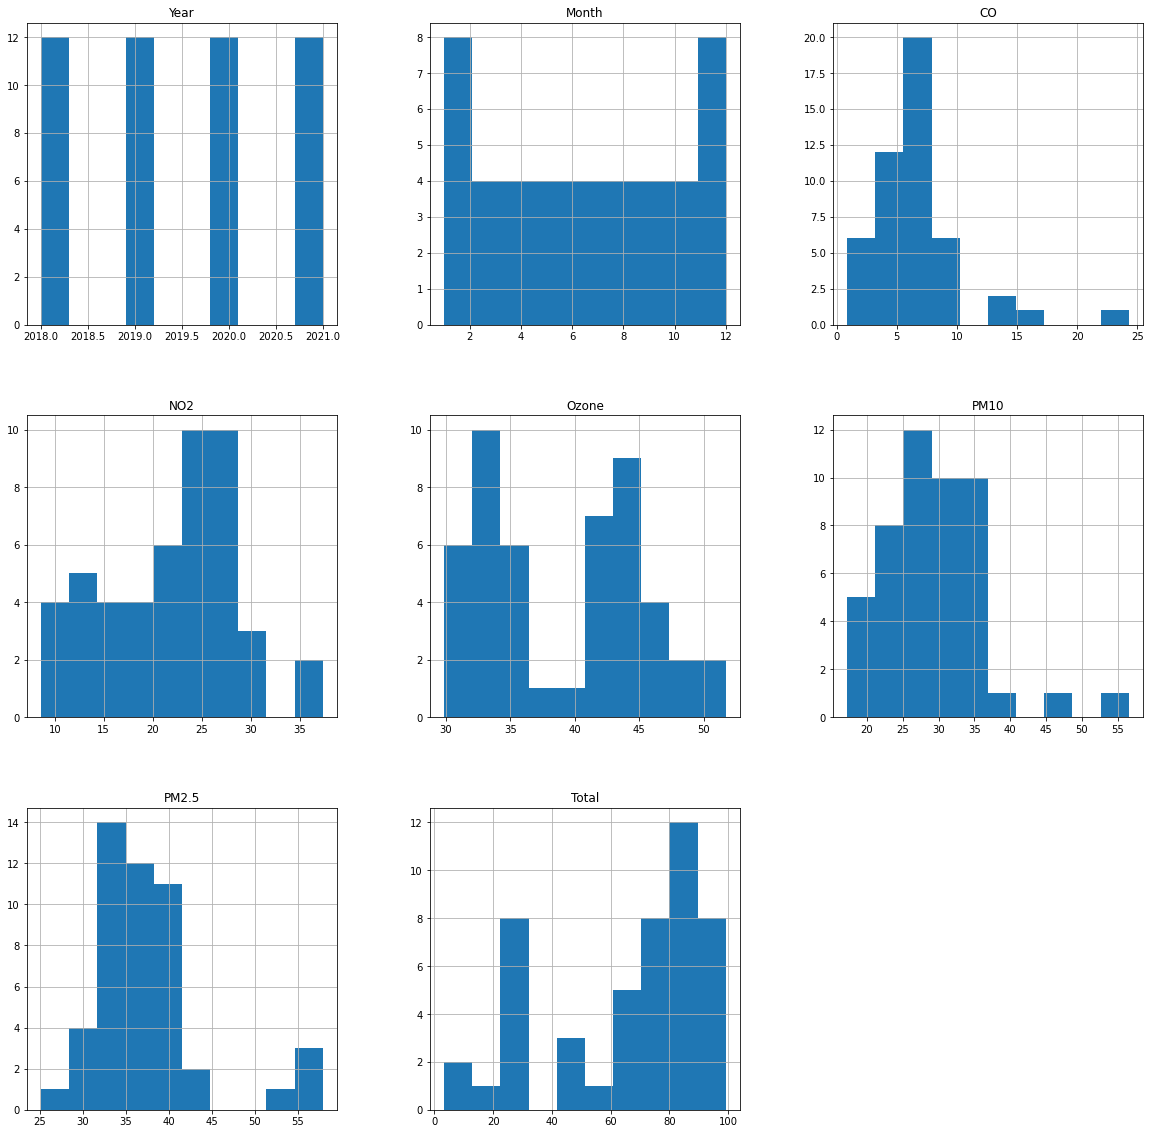

In [451]:
data2.hist(figsize=(20,20))

In [452]:
corr = data2.corr()
corr.style.background_gradient(cmap='coolwarm')

# The correlation between air travel and climate change is not strong, 
# but we can still use it to predict the impact of air travel on the environment.
# The highest correlation was experienced between Air Travel and NO2, among other AQI Emissions.

,Year,Month,CO,NO2,Ozone,PM10,PM2.5,Total
Year,1.000000,0.000000,-0.063641,-0.407068,-0.038234,0.167110,0.110120,-0.557239
Month,0.000000,1.000000,-0.012183,-0.286066,-0.267381,0.330091,0.234856,0.080059
CO,-0.063641,-0.012183,1.000000,0.125094,-0.187629,-0.082690,-0.162490,-0.160577
NO2,-0.407068,-0.286066,0.125094,1.000000,-0.399983,-0.373029,-0.320650,0.318434
Ozone,-0.038234,-0.267381,-0.187629,-0.399983,1.000000,0.215113,0.022762,0.151273
PM10,0.167110,0.330091,-0.082690,-0.373029,0.215113,1.000000,0.361864,-0.184393
PM2.5,0.110120,0.234856,-0.162490,-0.320650,0.022762,0.361864,1.000000,0.001577
Total,-0.557239,0.080059,-0.160577,0.318434,0.151273,-0.184393,0.001577,1.000000


In [453]:
# If we use air travel data, we can create a regression equation to predict the impact of air travel on the environment.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

# Metrics Used: Creating non-linearities of Air Travel to improve accuracy of the model
data2['TotalLog'] = np.log(data2['Total'])
data2['TotalnLog'] = np.log(data2['Total'])*data2['Total']
data2['Total_Sqrt'] = data2['Total']**(1/2)
data2['Total_SqrtnLog'] = np.log(data2['Total'])*data2['Total']**(1/2)
data2['Total_Exp'] = np.exp(data2['Total'])
data2['Total_Sq'] = data2['Total']**2
data2['Total_Cub'] = data2['Total']**3
data2['Total_Quad'] = data2['Total']**4
data2['Total_Quint'] = data2['Total']**5

In [454]:
# Creating a linear regression model
X = data2[['Total','TotalLog','TotalnLog','Total_Sq','Total_Cub','Total_Quad','Total_Quint','Total_Exp','Total_SqrtnLog','Total_Sqrt']]
Y = data2['NO2']

# Validation Set: Since this is a Time-Series dataset, I use prior data to train and test the model over later data.
index_2021 = X.index[data2['Year'] == 2021].tolist()
check = X.index.isin(index_2021)
X_train, X_val, Y_train, Y_val = X.iloc[~check], X.iloc[check], Y.iloc[~check], Y.iloc[check]

# Fitting the model
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

# Evaluation Stage: Mean squared error of the model
mse = mean_squared_error(Y_val, regressor.predict(X_val))
print(mse)

54.85679399209007


In [455]:
# We can again validate this using Statistical testing.
# Null Hyp = There was no sig. difference between the NO2 levels during and before the pandemic.

# Sample mean = Mean NO2 levels during covid 
# Population mean
# Sample Standard Deviation = Standard deviation of NO2 levels during covid
# Sample Size = Post April 2020 from the dataset, inclusive = 4

sample_mean = np.mean(data2['Total'][(data2['Month'] >= 4) & (data2['Year'] >= 2020)])
population_mean = np.mean(data2['Total'])
sample_std = np.std(data2['Total'][(data2['Month'] >= 4) & (data2['Year'] >= 2020)])
sample_size = len(data2['Total'][(data2['Month'] >= 4) & (data2['Year'] >= 2020)])

t_statistic = (sample_mean - population_mean)/(sample_std/math.sqrt(sample_size))
print(t_statistic)

p_value = 1 - t.cdf(abs(t_statistic), sample_size-1)
print(p_value)
# p-value is ~0.0, so we can reject the null hyp and conclude that at 99% LOS, there IS a significant difference between the the NO2 levels during and before the pandemic.

-3.8144526940872505
0.0006933246000583315


### I tried working with satellite data to correlate it with ground data, but it was too large and was throwing an error.
### Even through my prior experience with satellite data, I have come to realise the complexity in terms of dealing with it. About 90% of my time while working on Satellite datasets goes into data-prep.
##### This is one of the biggest reason why I respect the work done at Blue Sky Analytics, because if the data preparation is standardized, clean and simplified, people can easily focus on complex implementations and concrete impact

In [456]:
## https://zenodo.org/record/4603979#.Ywu-bOxBy3J
# import xarray as xr
# netcdf_file_name = 'cut_NOx-em-anthro_input4MIPs_emissions_ScenarioMIP_IAMC-MESSAGE-GLOBIOM-ssp245-1-1_gn_201501-210012.nc4year_v5.1.nc_baseline.nc'
# ds = xr.open_dataset(netcdf_file_name)
# df2 = ds.to_dataframe()
# df2.head()

# Possible Future Works

* Working with Satellite data